<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

## 실제 모델링을 위한 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
wine = pd.read_csv('/content/winequality_red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

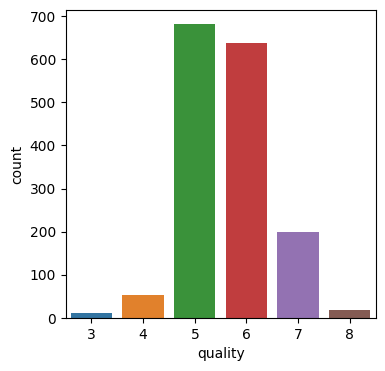

In [9]:
plt.figure(figsize=(4, 4))
sns.countplot(x='quality', data=wine)

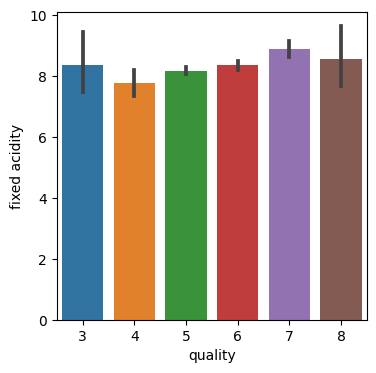

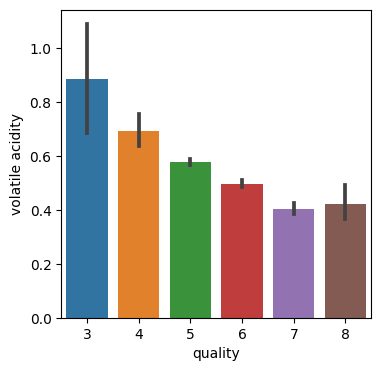

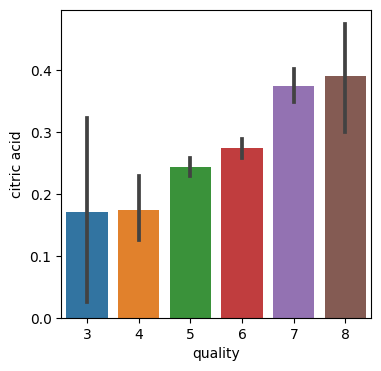

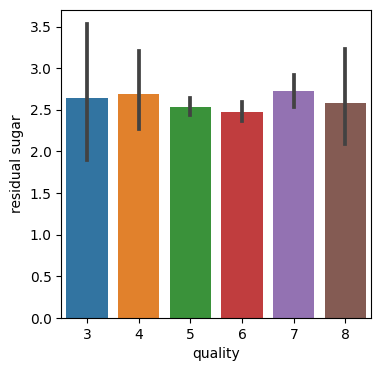

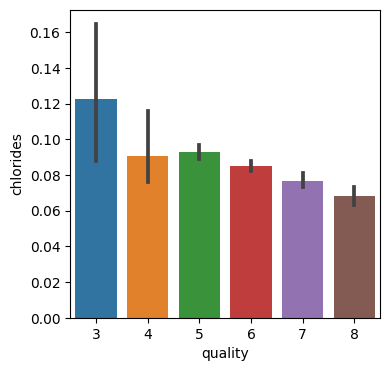

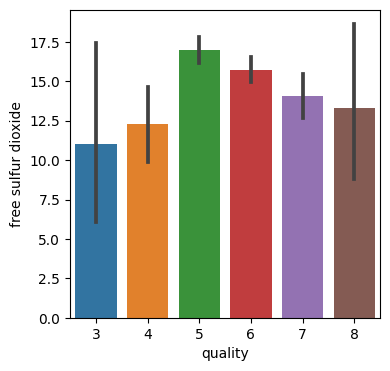

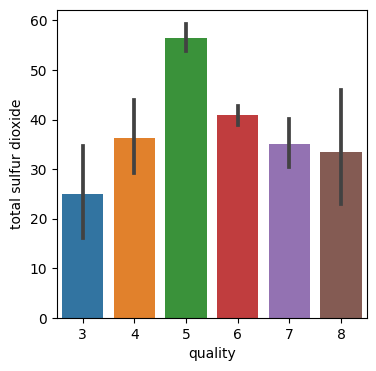

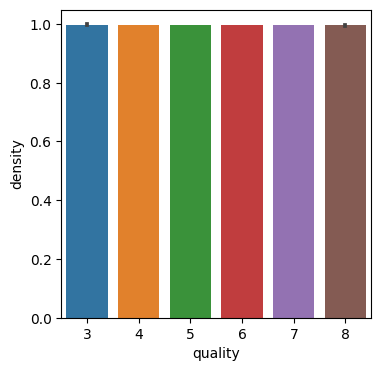

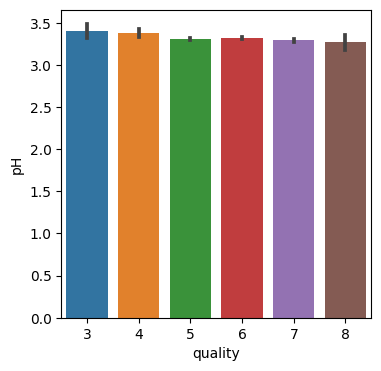

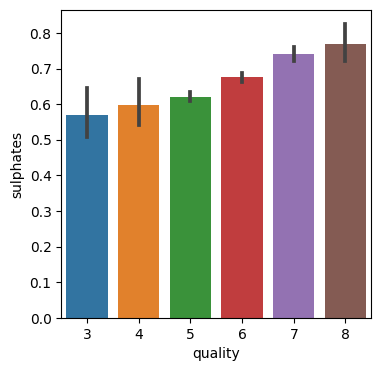

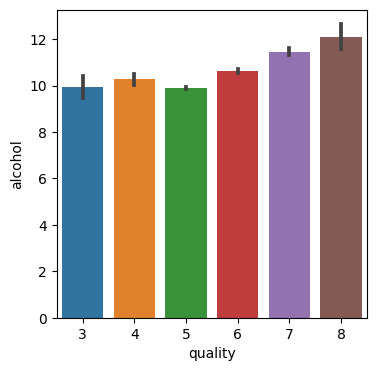

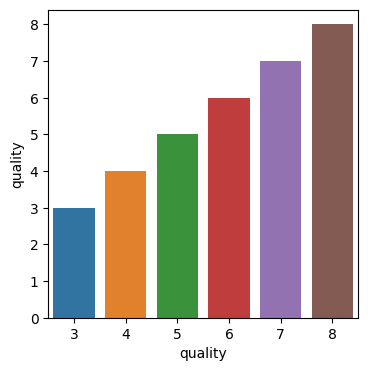

In [7]:
# 특성별로 데이터를 시각화 하여 데이터에 대한 정보를 파악합니다
df1 = wine.select_dtypes([int, float])

for i, col in enumerate(df1.columns):
    plt.figure(i, figsize=(4, 4))
    sns.barplot(x='quality', y =col, data=df1)

In [12]:
# 6.5점을 기준으로 좋은 와인과 나쁜 와인을 구분하겠다고 선언
bins = (2, 6.5, 8)
group_names = ['bad', 'good']

wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [13]:
# Good/Bad는 인식할 수 없음 -> 따라서 이를 인식할 수 있도록 Label Encoding을 실시
label_quality = LabelEncoder()

wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [14]:
# 종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']

# 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.8842845973416732
0.865625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print(lr.coef_, lr.intercept_)

[[-0.02787014 -2.82346586 -0.15572156  0.09658316 -1.30581315  0.01605262
  -0.01993236 -1.20105939 -2.26843704  2.03423885  0.89301013]] [-2.19767535]


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier(random_state = 2023)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

1.0
0.9


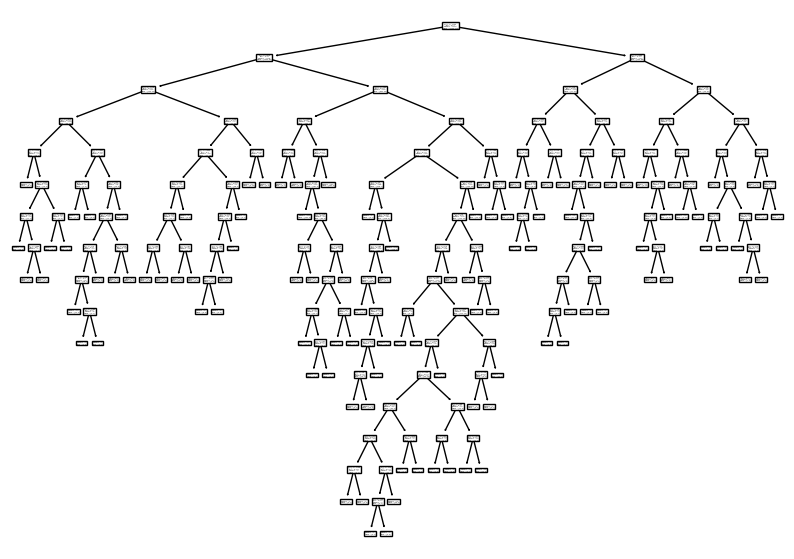

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize =(10,7))
plot_tree(dt)
plt.show()

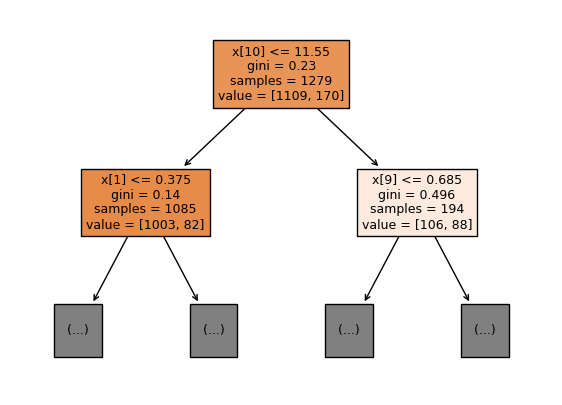

In [20]:
plt.figure(figsize =(7,5))
plot_tree(dt, max_depth = 1, filled = True)
plt.show()
# 1 = volatile acidity
# 9 = sulphates
# 10 = alcohol

- 조건
- 불순도(gini)
- 총 샘플 수(samples)
- 클래스별 샘플(value)

첫번째 노드는 알코올이 11.55를 기준으로 좋은 술인지 아닌지에 대한 기준을 내리고 있습니다. 왼쪽은 1109개로 오른쪽은 170개로 구분되었고, 원래 데이터에서는 Target이 1인 좋은 술이 170개로 나뉜 것을 볼 수 있는데 조건에 의해서 왼쪽 82개 오른쪽 88개로 나누어졌습니다. 이런식으로 조건에 의해 지속적으로 학습하게 됩니다.

두번째 왼쪽노드는 volatile acidity라는 산도에 의해 나뉘었고, 두번째 오른쪽 노드는 sulphates에 대해 나뉘었습니다. 여기서 filled = True의 효과가 나오는데요. 어떤 클래스의 비율이 높아지면 높아질수록 진한색이 되고, 그렇지 않으면 연한색으로 되게 됩니다. 연한색은 더 나눠질 필요성이 있는것이고, 진한색으로 되면 될수록 강력한 조건이라는 것을 의미합니다.

이렇게 직관적이기 때문에 의사결정나무는 가장 기본적으로 구축하는 모델이고, 이를 기반으로 고급트리모델들을 사용하게 됩니다.

`지니 불순도 = 1 - (타겟이 아닌 클래스 비율의 제곱 + 타겟 클래스 비율의 제곱)`

| 구분 | 음성 클래스 | 양성 클래스 |
| --- | --- | --- |
| 전체 | 1,279 | 1,279 |
| 클래스 갯수 | 1,109 | 170 |
| 클래스/전체 | 86.7% | 13.3% |
| 제곱 | 75.2% | 1.8% |
| 지니계수 | 23.0% |  |

만약 지니 불순도가 0.5 → 50%면 가장 안좋은 케이스이며, 지니 계수가 0에 가까울수록 좋은 케이스입니다.

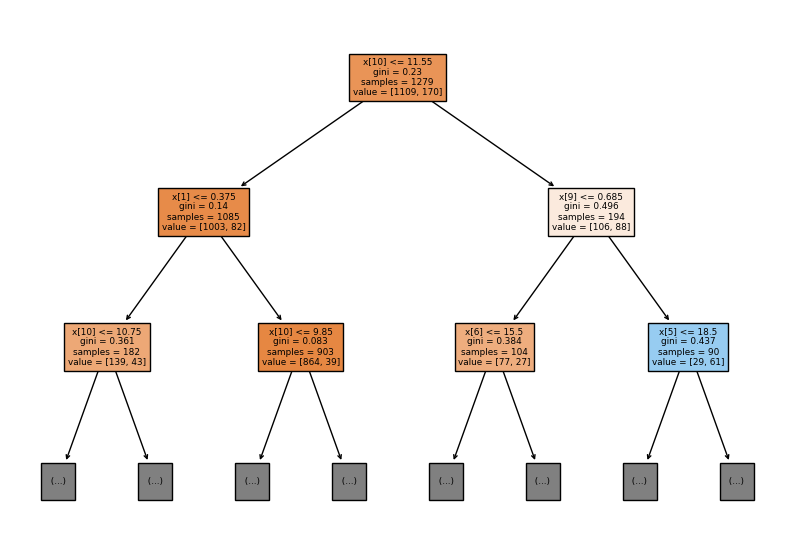

In [15]:
plt.figure(figsize =(10,7))
plot_tree(dt, max_depth = 2, filled = True)
plt.show()